This notebook focusses on the propagation of the generated stochastic proccesses through the Python-based dynamics model defined in the UQpy paper. Firstly, the sample generation code is presented details of which can be found in 'SRM.ipynb'.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

# Compute the power spectral density S(w) at various points frequencies w
S = 125 / 4 * w ** 2 * np.exp(-5 * w)

# Sample 10 realizations of the stochastic process
n_sim = 10

from UQpy.StochasticProcess import SRM
SRM_object = SRM(n_sim, S=S, dw=dw, nt=nt, nw=nw, case='uni')
samples = SRM_object.samples

With the generated samples, we define a UQpy RunModel object with the Python-based dynamics model.

In [6]:
from UQpy.RunModel import RunModel

dyn_model = RunModel(samples = SRM_object.samples, model_script='utils_dynamics.py', model_object_name='sdof_boucwen_SE', ntasks=1, 
                        time_vec=t)
qoi = np.array(dyn_model.qoi_list)

The plot below depicts the propagated displacement time histories of the dynamics model.

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


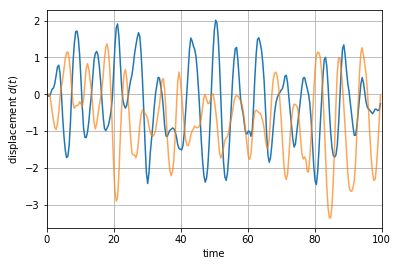

In [7]:
fig1 = plt.figure()
for j in range(2):
    plt.plot(t, qoi[j], alpha=1.-j*0.3)
plt.xlim(0, 100)
plt.xlabel('time')
plt.ylabel('displacement $d(t)$')
plt.grid('on', which='both')
plt.show()